In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83274,59766,-0.465927,0.740705,1.731343,0.036013,0.098876,0.055606,0.472815,0.134921,-0.302919,...,0.032294,0.287631,-0.337062,0.079929,0.091760,0.396666,0.078020,0.093914,1.00,0.0
83275,59767,-0.725577,0.379742,1.468039,1.356958,0.546077,0.109718,0.416071,0.180774,-0.273686,...,0.006224,0.017405,-0.101053,-0.294967,0.164357,-0.166337,0.114452,0.115366,46.96,0.0
83276,59768,-1.711347,1.308095,-0.232786,-1.607585,-1.299910,-0.627938,-1.562053,-1.722859,-1.534618,...,-0.902970,1.269219,0.178712,0.527195,-0.313104,-0.365365,0.216308,0.181065,10.00,0.0
83277,59768,1.471591,-1.234024,0.279178,-1.595504,-1.344324,-0.101130,-1.249330,0.030445,-1.813220,...,0.000785,0.310947,-0.194016,-0.504003,0.513079,0.008417,0.029493,0.007596,40.00,0.0
83278,59769,1.135220,0.124163,0.109082,0.902728,0.038998,0.004539,0.007332,0.113029,-0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83279 entries, 0 to 83278
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    83279 non-null  int64  
 1   V1      83279 non-null  float64
 2   V2      83279 non-null  float64
 3   V3      83279 non-null  float64
 4   V4      83279 non-null  float64
 5   V5      83279 non-null  float64
 6   V6      83279 non-null  float64
 7   V7      83279 non-null  float64
 8   V8      83279 non-null  float64
 9   V9      83279 non-null  float64
 10  V10     83278 non-null  float64
 11  V11     83278 non-null  float64
 12  V12     83278 non-null  float64
 13  V13     83278 non-null  float64
 14  V14     83278 non-null  float64
 15  V15     83278 non-null  float64
 16  V16     83278 non-null  float64
 17  V17     83278 non-null  float64
 18  V18     83278 non-null  float64
 19  V19     83278 non-null  float64
 20  V20     83278 non-null  float64
 21  V21     83278 non-null  float64
 22

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    83077
1.0      201
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(83077, 31)
(201, 31)


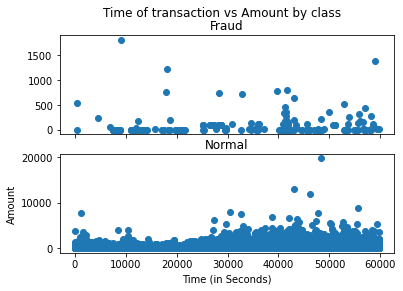

In [ ]:
# Plotting time of transaction to check for correlations

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    83077.000000
mean        98.225733
std        269.373860
min          0.000000
25%          7.700000
50%         26.990000
75%         89.690000
max      19656.530000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     201.000000
mean       99.628756
std       228.739325
min         0.000000
25%         1.000000
50%         7.520000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

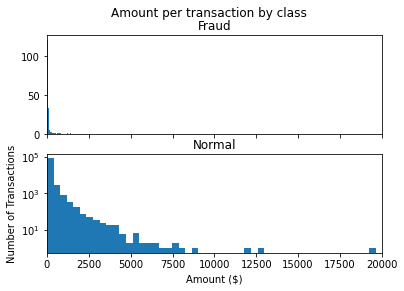

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(legit.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,38197.037038,-0.246222,-0.050140,0.701375,0.151217,-0.266942,0.099627,-0.096799,0.046602,-0.009665,...,0.041320,-0.031195,-0.105015,-0.037331,0.008906,0.133892,0.025943,0.000316,0.001995,98.225733
1.0,33751.094527,-6.422458,4.501157,-8.551463,5.131404,-4.655227,-1.986353,-6.786837,2.973793,-3.072795,...,0.406912,0.758621,-0.159979,-0.228778,-0.089971,0.232553,0.091620,0.568499,0.052008,99.628756


Text(0, 0.5, 'Frequency')

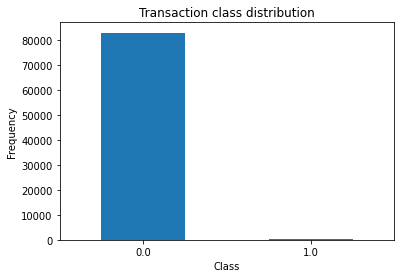

In [ ]:
count_classes = pd.value_counts(credit_card_data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
50118,44356,1.058652,0.287390,0.554697,2.640415,-0.504271,-0.828845,0.175563,-0.077214,-0.506164,...,0.042434,-0.145623,-0.044187,0.660319,0.429259,0.016725,-0.042459,0.028615,64.63,0.0
68851,53166,1.222401,0.582456,-0.344752,0.762416,0.046813,-1.194871,0.323131,-0.204881,-0.489564,...,-0.068653,-0.160993,-0.070876,0.459055,0.526713,0.337354,-0.035077,0.029342,0.76,0.0
2605,2132,0.886310,-0.860400,0.867378,0.179924,-1.070001,0.194305,-0.496628,0.133733,0.827942,...,-0.098469,-0.376944,-0.122137,0.107513,0.118704,0.926029,-0.062515,0.030073,166.74,0.0
61957,50064,1.063953,-0.878226,1.741909,0.567577,-1.669535,0.858634,-1.494906,0.680319,1.977578,...,-0.060720,0.223444,0.043236,0.277179,0.058232,1.135030,0.005154,-0.000231,1.00,0.0
55465,46952,0.975729,-0.220530,0.191831,0.602450,-0.334165,-0.489342,0.213647,-0.175433,-0.056937,...,0.155500,0.273199,-0.168238,0.168323,0.407964,0.547013,-0.046098,0.030781,134.94,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
80760,58642,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,...,-0.575924,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,113.92,1.0
81186,58822,-4.384221,3.264665,-3.077158,3.403594,-1.938075,-1.221081,-3.310317,-1.111975,-1.977593,...,2.076383,-0.990303,-0.330358,0.158378,0.006351,-0.493860,-1.537652,-0.994022,45.64,1.0
81609,59011,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,...,1.226648,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1389.56,1.0
82400,59385,-7.626924,-6.976420,-2.077911,3.416754,4.458758,-5.080408,-6.578948,1.760341,-0.599509,...,1.224795,-0.656639,-0.330811,-0.078946,0.270306,0.431119,0.821381,-1.056088,18.98,1.0
83053,59669,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,...,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,6.27,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    492
1.0    201
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,38819.737805,-0.485489,0.032032,0.550375,0.208500,-0.358885,0.057101,-0.032801,0.070546,0.025028,...,-0.028095,0.009460,-0.117892,-0.074828,0.011072,0.119387,0.026997,0.018351,0.010918,113.472520
1.0,33751.094527,-6.422458,4.501157,-8.551463,5.131404,-4.655227,-1.986353,-6.786837,2.973793,-3.072795,...,0.406912,0.758621,-0.159979,-0.228778,-0.089971,0.232553,0.091620,0.568499,0.052008,99.628756


Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
50118  44356  1.058652  0.287390  0.554697  2.640415 -0.504271 -0.828845   
68851  53166  1.222401  0.582456 -0.344752  0.762416  0.046813 -1.194871   
2605    2132  0.886310 -0.860400  0.867378  0.179924 -1.070001  0.194305   
61957  50064  1.063953 -0.878226  1.741909  0.567577 -1.669535  0.858634   
55465  46952  0.975729 -0.220530  0.191831  0.602450 -0.334165 -0.489342   
...      ...       ...       ...       ...       ...       ...       ...   
80760  58642 -0.451383  2.225147 -4.953050  4.342228 -3.656190 -0.020121   
81186  58822 -4.384221  3.264665 -3.077158  3.403594 -1.938075 -1.221081   
81609  59011 -2.326922 -3.348439 -3.513408  3.175060 -2.815137 -0.203363   
82400  59385 -7.626924 -6.976420 -2.077911  3.416754  4.458758 -5.080408   
83053  59669  0.326007  1.286638 -2.007181  2.419675 -1.532902 -1.432803   

             V7        V8        V9  ...       V20       V21       V22  \
50118  0.1755

In [ ]:
print(Y)

50118    0.0
68851    0.0
2605     0.0
61957    0.0
55465    0.0
        ... 
80760    1.0
81186    1.0
81609    1.0
82400    1.0
83053    1.0
Name: Class, Length: 693, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(693, 30) (554, 30) (139, 30)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9657039711191335


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9496402877697842
